<a href="https://colab.research.google.com/github/shoaibahmad0/Intro-to-Data_Science/blob/main/kidney_disease_classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
sns.set()

# Creating the training set

In [22]:
from pathlib import Path

# Step 2: Define the path correctly to the dataset in your Drive
data_dir = Path('/content/drive/MyDrive/DataSets')

# Check the directory structure
print("Dataset Directory:", data_dir)
print("Subdirectories:", os.listdir(data_dir))


Dataset Directory: /content/drive/MyDrive/DataSets
Subdirectories: ['Tumor', 'Cyst', 'Stone', 'Normal', '.ipynb_checkpoints', 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']


In [23]:
# Print files in each subdirectory to make sure images are present
Normal_Cases_dir = data_dir / 'Normal'
Cyst_Cases_dir = data_dir / 'Cyst'
Stone_Cases_dir = data_dir / 'Stone'
Tumor_Cases_dir = data_dir / 'Tumor'

print("Normal Folder:", os.listdir(Normal_Cases_dir))
print("Cyst Folder:", os.listdir(Cyst_Cases_dir))
print("Stone Folder:", os.listdir(Stone_Cases_dir))
print("Tumor Folder:", os.listdir(Tumor_Cases_dir))


Normal Folder: ['Normal- (4671).jpg', 'Normal- (4665).jpg', 'Normal- (4668).jpg', 'Normal- (4667).jpg', 'Normal- (4658).jpg', 'Normal- (4675).jpg', 'Normal- (4672).jpg', 'Normal- (4673).jpg', 'Normal- (4666).jpg', 'Normal- (467).jpg', 'Normal- (4693).jpg', 'Normal- (4686).jpg', 'Normal- (4692).jpg', 'Normal- (4684).jpg', 'Normal- (4687).jpg', 'Normal- (4683).jpg', 'Normal- (4700).jpg', 'Normal- (4701).jpg', 'Normal- (4702).jpg', 'Normal- (4688).jpg', 'Normal- (4685).jpg', 'Normal- (470).jpg', 'Normal- (4694).jpg', 'Normal- (4689).jpg', 'Normal- (4679).jpg', 'Normal- (468).jpg', 'Normal- (4698).jpg', 'Normal- (4691).jpg', 'Normal- (47).jpg', 'Normal- (469).jpg', 'Normal- (4703).jpg', 'Normal- (4696).jpg', 'Normal- (4682).jpg', 'Normal- (4697).jpg', 'Normal- (4690).jpg', 'Normal- (4678).jpg', 'Normal- (4699).jpg', 'Normal- (4680).jpg', 'Normal- (4681).jpg', 'Normal- (4695).jpg', 'Normal- (4704).jpg', 'Normal- (4717).jpg', 'Normal- (4712).jpg', 'Normal- (4728).jpg', 'Normal- (4720).jpg', 

In [24]:
# Now loading images using Path.glob
Normal_Cases = list(Normal_Cases_dir.glob('*.jpg'))
Cyst_Cases = list(Cyst_Cases_dir.glob('*.jpg'))
Stone_Cases = list(Stone_Cases_dir.glob('*.jpg'))
Tumor_Cases = list(Tumor_Cases_dir.glob('*.jpg'))

# Print to check if images were loaded
print("Normal Cases:", Normal_Cases)
print("Cyst Cases:", Cyst_Cases)
print("Stone Cases:", Stone_Cases)
print("Tumor Cases:", Tumor_Cases)


Normal Cases: [PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4671).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4665).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4668).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4667).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4658).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4675).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4672).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4673).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4666).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (467).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4693).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4686).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4692).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/

In [25]:
# Checking the number of images in the Normal directory
print(f"Number of Normal images: {len(Normal_Cases)}")


Number of Normal images: 5077


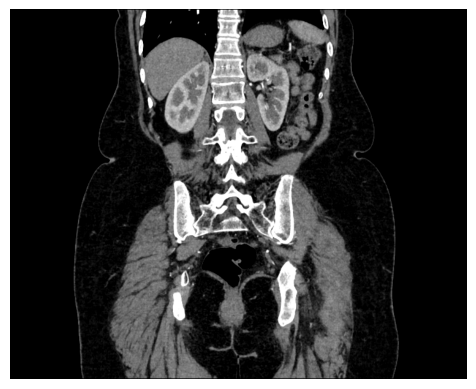

In [26]:
import matplotlib.pyplot as plt
import cv2

# Load the first image to visualize
image_path = Normal_Cases[0]
image = cv2.imread(str(image_path))

# Convert from BGR (OpenCV default) to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [27]:
from pathlib import Path

# Define the paths for train, val, and test directories
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

# Create the directories if they don't exist
train_dir.mkdir(parents=True, exist_ok=True)
val_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

print(f"Created directories: {train_dir}, {val_dir}, {test_dir}")


Created directories: /content/drive/MyDrive/DataSets/train, /content/drive/MyDrive/DataSets/val, /content/drive/MyDrive/DataSets/test


In [28]:
# Create subdirectories for each class
for category in ['Normal', 'Cyst', 'Stone', 'Tumor']:
    (train_dir / category).mkdir(parents=True, exist_ok=True)
    (val_dir / category).mkdir(parents=True, exist_ok=True)
    (test_dir / category).mkdir(parents=True, exist_ok=True)

print("Created class subdirectories for train, val, and test sets.")


Created class subdirectories for train, val, and test sets.


In [29]:
from sklearn.model_selection import train_test_split

# Get the paths for each category
Normal_Cases = list((data_dir / 'Normal').glob('*.jpg'))
Cyst_Cases = list((data_dir / 'Cyst').glob('*.jpg'))
Stone_Cases = list((data_dir / 'Stone').glob('*.jpg'))
Tumor_Cases = list((data_dir / 'Tumor').glob('*.jpg'))

# Combine all image paths and corresponding labels
all_images = Normal_Cases + Cyst_Cases + Stone_Cases + Tumor_Cases
labels = [0] * len(Normal_Cases) + [1] * len(Cyst_Cases) + [2] * len(Stone_Cases) + [3] * len(Tumor_Cases)

# Split into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(all_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 9980, Validation size: 1248, Test size: 1248


In [30]:
import shutil

# Function to move images to corresponding directories
def move_images(image_paths, labels, base_dir):
    for img_path, label in zip(image_paths, labels):
        # Get the class name based on the label
        class_name = ['Normal', 'Cyst', 'Stone', 'Tumor'][label]

        # Create the destination path
        dest_dir = base_dir / class_name
        shutil.copy(str(img_path), str(dest_dir))
        print(f"Moved {img_path.name} to {dest_dir}")

# Move images for train, val, and test sets
move_images(X_train, y_train, train_dir)
move_images(X_val, y_val, val_dir)
move_images(X_test, y_test, test_dir)


Streaming output truncated to the last 5000 lines.
Moved Stone- (251).jpg to /content/drive/MyDrive/DataSets/train/Stone
Moved Tumor- (2148).jpg to /content/drive/MyDrive/DataSets/train/Tumor
Moved Cyst- (485).jpg to /content/drive/MyDrive/DataSets/train/Cyst
Moved Cyst- (3653).jpg to /content/drive/MyDrive/DataSets/train/Cyst
Moved Normal- (154).jpg to /content/drive/MyDrive/DataSets/train/Normal
Moved Stone- (108).jpg to /content/drive/MyDrive/DataSets/train/Stone
Moved Normal- (5012).jpg to /content/drive/MyDrive/DataSets/train/Normal
Moved Tumor- (1276).jpg to /content/drive/MyDrive/DataSets/train/Tumor
Moved Normal- (4803).jpg to /content/drive/MyDrive/DataSets/train/Normal
Moved Normal- (437).jpg to /content/drive/MyDrive/DataSets/train/Normal
Moved Tumor- (1768).jpg to /content/drive/MyDrive/DataSets/train/Tumor
Moved Cyst- (2150).jpg to /content/drive/MyDrive/DataSets/train/Cyst
Moved Cyst- (1469).jpg to /content/drive/MyDrive/DataSets/train/Cyst
Moved Cyst- (2274).jpg to /cont

In [71]:
# Initialize an empty list for train data
train_data = []

# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

# Convert the list of tuples to a pandas dataframe
train_data = pd.DataFrame(train_data, columns=['image', 'label'])

# Shuffle the data randomly
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Show the first few rows of the dataframe to verify
print(train_data.head())

# Verify unique labels
print(train_data['label'].unique())


                                               image  label
0  /content/drive/MyDrive/DataSets/Cyst/Cyst- (62...      0
1  /content/drive/MyDrive/DataSets/Normal/Normal-...      1
2  /content/drive/MyDrive/DataSets/Cyst/Cyst- (34...      0
3  /content/drive/MyDrive/DataSets/Cyst/Cyst- (10...      0
4  /content/drive/MyDrive/DataSets/Tumor/Tumor- (...      3
[0 1 3 2]


In [72]:
# Returns all the unique values of 'label' in train_data
unique_labels = train_data['label'].unique()

# Display the unique labels
print(unique_labels)


[0 1 3 2]


In [73]:
# Returns all the unique values of 'label' in train_data
unique_labels = train_data['label'].unique()

# Display the unique labels
print(unique_labels)


[0 1 3 2]


In [74]:
# Returns number of rows and columns
train_data.shape

(12476, 2)

# Plotting dataset classes

In [75]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

,count
label,
1,5077
0,3709
3,2313
2,1377


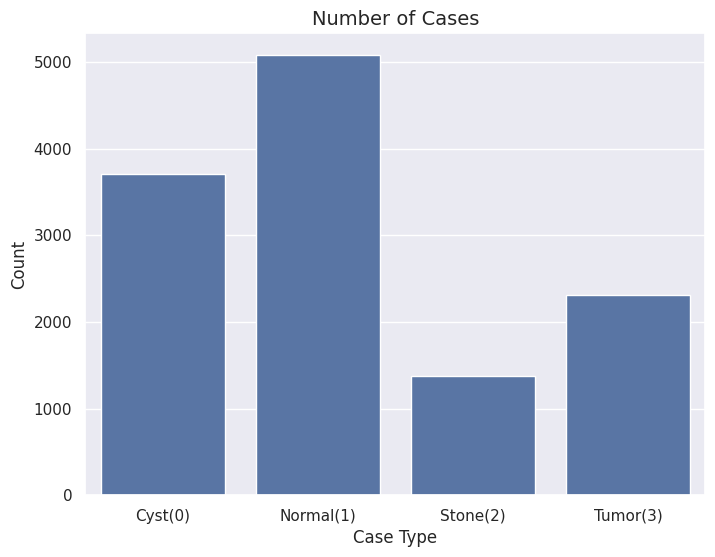

In [76]:
# Plotting the Graph
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

# CT Scanned

In [77]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples

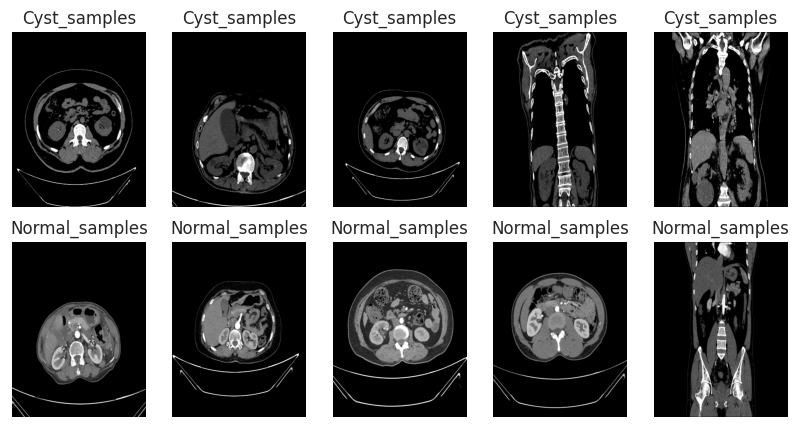

In [78]:
# Displaying the picture
f, ax = plt.subplots(2, 5,figsize=(10,5)) # Initilizing the graph where image is to be display

for i in range(10):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image

    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")

    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()


In [79]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [80]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

# Data Preprocessing

In [81]:
for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

In [82]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [83]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [84]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [85]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (9980, 28, 28, 3)
Total number of Labels :  (9980,)


In [86]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [87]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
9975,Tumor
9976,Tumor
9977,Tumor
9978,Tumor


In [88]:
train_labels1['label'].unique()


array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [89]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [90]:
print(train_data1.shape)
print(train_labels1.shape)

(9980, 28, 28, 3)
(9980, 1)


In [91]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

,0
label,0


# Solving Image Dataset Imblance Using SMOTE

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

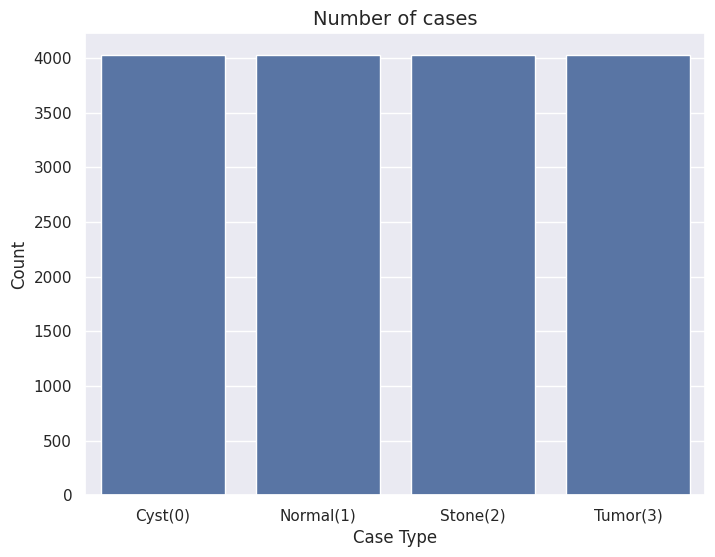

In [93]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [94]:
train_data2.shape


(16100, 2352)

In [95]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape

(16100, 28, 28, 3)

In [96]:
train_data2[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

# Splitting the Dataset For training and testing and Validating using sklearn : train_test_split

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size = 0.10,random_state = 42)

In [98]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (14490, 28, 28, 3)
Testing Data X :  (3220, 28, 28, 3)
Training Data y :  (14490, 1)
Testing Data y :  (3220, 1)
Validating Data X :  (1610, 28, 28, 3)
Validating Data y (1610, 1)
Image Size :  (28, 28, 3)


# Data Augmentation

In [99]:
import tensorflow as tf

In [100]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30,
                    horizontal_flip=True)

# CNN

In [101]:
from tensorflow.keras import layers,models

In [102]:
model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           6,404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,380 (91.33 KB)

 Trainable params: 23,380 (91.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
453/453 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.6076 - loss: 0.9111 - val_accuracy: 0.9540 - val_loss: 0.1976
Epoch 2/3
453/453 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9679 - loss: 0.1382 - val_accuracy: 0.9925 - val_loss: 0.0496
Epoch 3/3
453/453 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9944 - loss: 0.0395 - val_accuracy: 0.9988 - val_loss: 0.0145


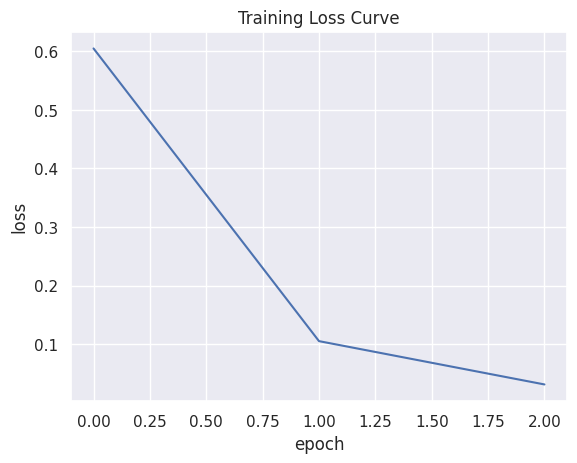

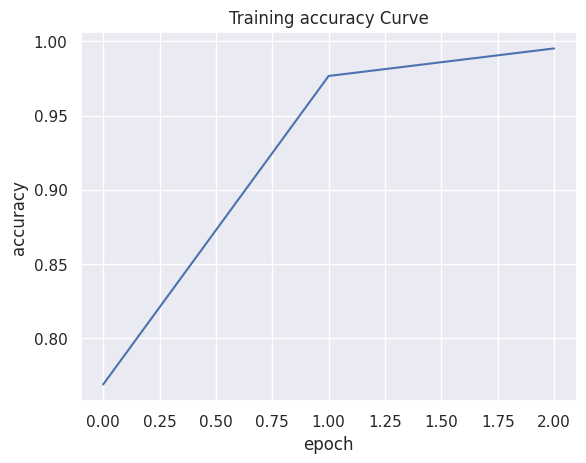

In [103]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Fit
history = model.fit(np.array(X_train), np.array(y_train), epochs=3, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [104]:
#Predicting Values

a = model.predict(X_test)
print(a)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[9.9741739e-01 1.9301650e-03 5.3753774e-04 1.1503689e-04]
 [4.0208345e-04 7.1090493e-05 1.9929837e-06 9.9952477e-01]
 [3.0686515e-06 1.7053592e-08 8.0444667e-15 9.9999684e-01]
 ...
 [6.5785898e-03 1.6850932e-03 9.7962761e-01 1.2108750e-02]
 [3.1378838e-07 1.7844766e-03 9.9819094e-01 2.4249561e-05]
 [8.9404028e-05 2.2806171e-03 9.9743217e-01 1.9779861e-04]]


In [105]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[0, 3, 3, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 2, 3, 0, 3, 3, 2, 3, 1, 2, 3, 3, 0, 2, 0, 1, 2, 2, 3, 2, 2, 0, 2, 0, 0, 0, 0, 1, 3, 1, 3, 1, 2, 3, 2, 3, 3, 0, 1, 1, 2, 3, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 3, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 3, 0, 1, 1, 2, 3, 1, 3, 3, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 2, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 0, 3, 3, 1, 2, 3, 1, 3, 1, 1, 0, 1, 3, 3, 0, 1, 0, 2, 2, 3, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 3, 0, 1, 0, 2, 0, 3, 3, 1, 2, 2, 2, 0, 3, 1, 1, 2, 2, 0, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 1, 1, 1, 3, 0, 0, 3, 1, 3, 0, 1, 3, 3, 0, 1, 1, 2, 3, 0, 1, 2, 3, 3, 2, 2, 1, 0, 3, 0, 3, 1, 0, 0, 2, 3, 1, 3, 0, 2, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 1, 1, 2, 0, 1, 3, 1, 0, 1, 3, 0, 3, 1, 0, 0, 0, 2, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 0, 3, 0, 0, 0, 1, 1, 0, 3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 0, 2, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 3, 0, 2, 2, 3, 3, 1, 

In [106]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  0.9990683229813665


Confusion Matrix : 

 [[803   0   1   0]
 [  0 813   0   0]
 [  0   1 784   0]
 [  0   1   0 817]]


[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

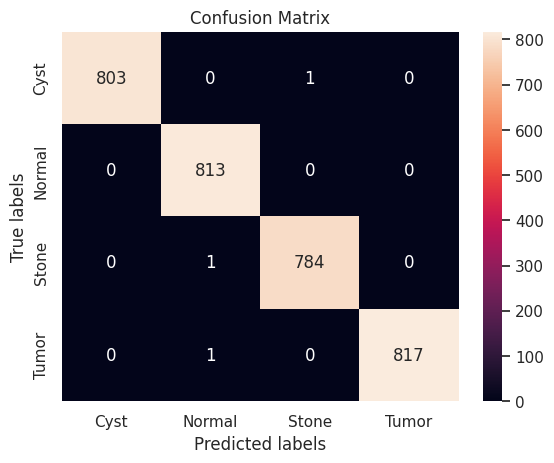

In [107]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [108]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))


F1 Score is : 0.9990683229813665


In [109]:
pic = []
image='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (564).jpg'
img = cv2.imread(str(image))

In [111]:
img = cv2.imread(image_path)
if img is None:
    print(f"Error loading image: {image_path}")
else:
    img = cv2.resize(img, (28, 28))
    pic.append(img)


In [113]:
pic = []  # Initialize an empty list for storing image data

# Assuming 'img' is the image after reading and resizing
img = cv2.imread(image_path)
if img is not None:
    img = cv2.resize(img, (28, 28))
    pic.append(img)

# Convert the list of images to a numpy array
pic1 = np.array(pic)

# Now, you can use pic1 for prediction
a = model.predict(pic1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [114]:
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

Kidney is "Normal" 


In [115]:
model.save('O:\Data_science_projects\Detection-and-Classification-of-Kidney-Diseases-Using-CT-Scanned-Image/model.h5')

In [116]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflowjs'

In [ ]:
tfjs.converters.save_keras_model(model,"C:\Data_science_projects\Detection-and-Classification-of-Kidney-Diseases-Using-CT-Scanned-Image/model.h5")

In [117]:
pic1.shape

(1, 28, 28, 3)